In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apartado 2. Regresión Lineal Regularizada - Curva de Aprendizaje

In [2]:
#Hipotesis
def hipotesis(X, Theta):
    return Theta[0] + Theta[1] * X

In [3]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    h = np.dot(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    return J

In [4]:
def gradient_funct(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    h = np.dot(X, Theta)
    grad = np.matmul(h - y, X)
    grad = grad/m
    grad_0 = grad[0]
    reg_term = (Lambda/m)*Theta
    grad = grad + reg_term
    grad[0] = grad_0
    return grad

In [5]:
def cost_and_gradient(Theta, X, y, Lambda):
    return cost_funct(Theta, X, y, Lambda), gradient_funct(Theta, X, y, Lambda)

In [6]:
def draw_graph(Theta, X, y):
    plt.scatter(X, y, marker = 'x', c = 'red')
    y = hipotesis(X, Theta)
    plt.plot(X, y, c='blue')
    plt.legend()
    plt.show()

In [7]:
def learning_curve(X, y, Lambda, Theta, Xval, yval):
    
    m1 = X.shape[0]
    m2 = Xval.shape[0]
    err1 = np.zeros(m1)
    err2 = np.zeros(m2)
    
    for i in range(1, X.shape[0] + 1):
        result = opt.minimize(cost_and_gradient, Theta, args=(X[0:i], y[0:i], Lambda), jac=True, method='TNC')
        ThetasOpt = result.x
        
        err1[i - 1] = error_calculation(ThetasOpt, X[0:i], y[0:i], m1)
        err2[i - 1] = error_calculation(ThetasOpt, Xval, yval, m2)
        
    return err1, err2

In [8]:
def error_calculation(Theta, X, y, m):
    h = np.dot(X, Theta)
    J = np.sum((h - y.T)**2)
    J = J/(2*m)
    return J

In [9]:
def draw_learning_curve(err1, err2):
    l = np.arange(len(err1))
    b = err1
    plt.plot(l, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(l, d, c="orange", label="Cross Validation")

In [10]:
def main():
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    X = mat.get("X")
    y = mat.get("y")
    y = y[:, -1]
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    yval = yval[:, -1]
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    X_ones = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    Xval_ones = np.hstack((np.ones(shape=(Xval.shape[0],1)),Xval))
    Theta = np.ones(X_ones.shape[1])
    
    cost = cost_funct(Theta, X_ones, y, Lambda)
    grad = gradient_funct(Theta, X_ones, y, Lambda)
    
    print("cost:", cost)
    print("grad:", grad)
    
    res_error = opt.minimize(cost_and_gradient, Theta, args=(X_ones, y, Lambda), jac=True, method='TNC')
    print(res_error)
    ThetaOpt = res_error.x
    
    err1, err2 = learning_curve(X_ones, y, Lambda, Theta, Xval_ones, yval)
    draw_learning_curve(err1, err2)
    
    plt.legend()
    plt.show()

(12, 1) (12,)
(21, 1) (21,)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026
cost: 303.9515255535976
grad: [-15.30301567 598.16741084]
     fun: 22.373906495109022
     jac: array([ 4.58192441e-07, -2.30943942e-08])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 9
     nit: 4
  status: 1
 success: True
       x: array([13.08790398,  0.36777923])


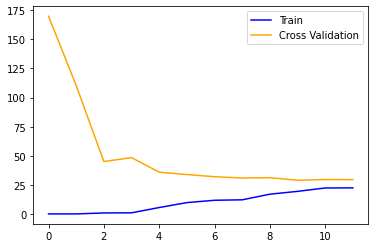

In [11]:
main()